# ENTREGA FINAL 
## GeoDataFrame


In [2]:
from  fiona import listlayers
import os

russiaMaps=os.path.join('maps','russiaMaps_5940_all.gpkg')

#layers in maps
listlayers(russiaMaps)


['airports',
 'states',
 'municipalities',
 'country',
 'cities',
 'rivers',
 'border']

In [3]:
# reading in the data:
import os
import geopandas as gpd

states=gpd.read_file(russiaMaps,layer='states')
municipalities=gpd.read_file(russiaMaps,layer='municipalities')
airports=gpd.read_file(russiaMaps,layer='airports')
rivers=gpd.read_file(russiaMaps,layer='rivers')
border=gpd.read_file(russiaMaps,layer='border')

In [4]:
import pandas as pd 


portsFile=os.path.join('data','UpdatedPub150.csv')

infoseaports=pd.read_csv(portsFile)

infoseaports.columns.to_list()

['World Port Index Number',
 'Region Name',
 'Main Port Name',
 'Alternate Port Name',
 'UN/LOCODE',
 'Country Code',
 'World Water Body',
 'IHO S-130 Sea Area',
 'Sailing Direction or Publication',
 'Publication Link',
 'Standard Nautical Chart',
 'IHO S-57 Electronic Navigational Chart',
 'IHO S-101 Electronic Navigational Chart',
 'Digital Nautical Chart',
 'Tidal Range (m)',
 'Entrance Width (m)',
 'Channel Depth (m)',
 'Anchorage Depth (m)',
 'Cargo Pier Depth (m)',
 'Oil Terminal Depth (m)',
 'Liquified Natural Gas Terminal Depth (m)',
 'Maximum Vessel Length (m)',
 'Maximum Vessel Beam (m)',
 'Maximum Vessel Draft (m)',
 'Offshore Maximum Vessel Length (m)',
 'Offshore Maximum Vessel Beam (m)',
 'Offshore Maximum Vessel Draft (m)',
 'Harbor Size',
 'Harbor Type',
 'Harbor Use',
 'Shelter Afforded',
 'Entrance Restriction - Tide',
 'Entrance Restriction - Heavy Swell',
 'Entrance Restriction - Ice',
 'Entrance Restriction - Other',
 'Overhead Limits',
 'Underkeel Clearance Manage

In [5]:
infoseaports.rename(columns={'Main Port Name':'portName'},inplace=True)

infoseaports=infoseaports.loc[:,['portName', 'Country Code','Latitude', 'Longitude']]

infoseaports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3739 entries, 0 to 3738
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   portName      3739 non-null   object 
 1   Country Code  3739 non-null   object 
 2   Latitude      3739 non-null   float64
 3   Longitude     3739 non-null   float64
dtypes: float64(2), object(2)
memory usage: 117.0+ KB


In [6]:
infoseaports.head()


,portName,Country Code,Latitude,Longitude
0,Maurer,United States,40.533333,-74.250000
1,Mangkasa Oil Terminal,Indonesia,-2.733333,121.066667
2,Iharana,Madagascar,-13.350000,50.000000
3,Andoany,Madagascar,-13.400000,48.300000
4,Chake Chake,Tanzania,-5.250000,39.766667


In [7]:
seaports=gpd.GeoDataFrame(data=infoseaports.copy(),
                           geometry=gpd.points_from_xy(infoseaports.Longitude,
                                                       infoseaports.Latitude), 
                          crs=4326)


seaports_russ=seaports[seaports['Country Code']=='Russia'].copy()


seaports_russ.reset_index(drop=True, inplace=True)


seaports_russ_5940=seaports_russ.to_crs(5940)

<Axes: >

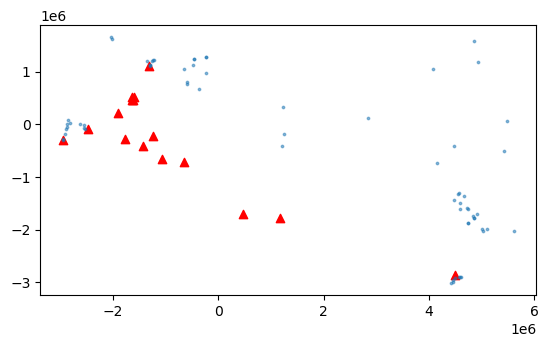

In [8]:
largeAirports=airports[airports['kind']=='large_airport']
largeAirports.reset_index(drop=True, inplace=True)


base=largeAirports.plot(color='red',marker="^")
seaports_russ_5940.plot(ax=base,alpha=0.5,markersize=3)

# Parte 01: Distancia entre los objetos espaciales
## Distancia entre puntos

In [9]:
seaports_russ_5940.head()

,portName,Country Code,Latitude,Longitude,geometry
0,Bukhta Gaydamak,Russia,42.866667,132.683333,POINT (4572656.440 -2903653.774)
1,Adler,Russia,43.433333,39.933333,POINT (-2954064.563 -303104.287)
2,Vitaz Marine Terminal,Russia,52.700000,143.550000,POINT (4672279.177 -1353504.256)
3,Shakotan,Russia,43.866667,146.833333,POINT (5606042.767 -2028420.271)
4,Azov,Russia,47.100000,39.433333,POINT (-2542815.985 -63900.270)


In [10]:
largeAirports.head()

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
0,Sheremetyevo International Airport,large_airport,55.972599,37.414600,622.0,Moscow Oblast,Moscow,POINT (-1594689.376 517304.239)
1,Domodedovo International Airport,large_airport,55.408798,37.906300,588.0,Moscow Oblast,Moscow,POINT (-1644777.787 459913.318)
2,Pulkovo Airport,large_airport,59.800301,30.262501,78.0,Saint Petersburg (city),St. Petersburg,POINT (-1308631.240 1097188.014)
3,Vnukovo International Airport,large_airport,55.591499,37.261501,685.0,Moscow Oblast,Moscow,POINT (-1641365.027 509424.872)
4,Novosibirsk Tolmachevo Airport,large_airport,55.019756,82.618675,365.0,Novosibirsk Oblast,Novosibirsk,POINT (475373.773 -1702445.286)


In [11]:
distanceMatrixKM_sea_air= seaports_russ_5940.set_index('portName').geometry.apply\
                          (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
                          sort_index(axis=0).sort_index(axis=1)

In [13]:
selected_row = distanceMatrixKM_sea_air.iloc[0]

In [14]:
min_distance_airport = selected_row.idxmin()

In [15]:
min_distance_seaport_coords = seaports_russ_5940.loc[min_distance_airport].geometry.coords[0]
min_distance_airport_coords = largeAirports.loc[min_distance_airport].geometry.coords[0]

KeyError: 'Sochi International Airport'

In [16]:
print('Sochi International Airport' in largeAirports['name'].values)


True


In [17]:
airport_name = 'Sochi International Airport'.strip()
print(airport_name in largeAirports['name'].values)

True


In [18]:
airport_name = 'Sochi International Airport'
airport_name = airport_name.lower()
print(airport_name in largeAirports['name'].str.lower().values)

True


In [19]:
min_distance_seaport_coords = seaports_russ_5940.loc[min_distance_airport].geometry.coords[0]
min_distance_airport_coords = largeAirports.loc[min_distance_airport].geometry.coords[0]

KeyError: 'Sochi International Airport'